In [1]:
import pandas as pd
import numpy as np

"ASTROPY"
from astropy.time import Time
from astropy.table import Table
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
import astropy.units as u

In [2]:
"MATPLOTLIB"
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

mpl.rcParams['font.family'] = 'Latin Modern Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

In [3]:
"PARA IMPORTAR DE IPYNB"
import import_ipynb
import utils

importing Jupyter notebook from utils.ipynb


In [4]:
ephemeris = pd.read_csv("../ephemeris2.csv")
ephemeris['hours'] = 24*(ephemeris['datetime_jd']-ephemeris['datetime_jd'][0])
MIN = ephemeris['delta (Rt)'].argmin()


'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


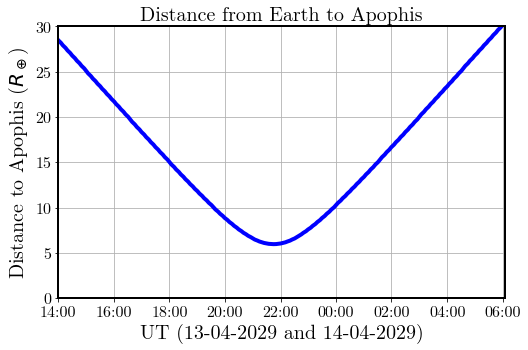

In [5]:
def xaxes():
    xticks = range(6,len(ephemeris),24)
    plt.xlim([ephemeris['hours'].iloc[6],ephemeris['hours'].iloc[-1]])
    plt.xticks([ephemeris['hours'][i] for i in xticks],
                [ephemeris['datetime_str'][i][-5:] for i in xticks], size=16)
    

fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Distance from Earth to Apophis",size=20)
ax.plot(ephemeris['hours'],ephemeris['delta (Rt)'],'b-',lw=4)
ax.set_xlabel("UT (13-04-2029 and 14-04-2029)")
ax.set_ylabel("Distance to Apophis ($R_\oplus$)")
ax.grid()
xaxes()
plt.yticks(size=16)
plt.ylim([0,30])

name = "../Figures/fig1_distance_plot"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


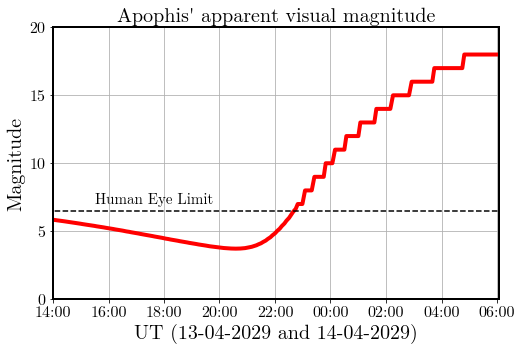

In [6]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Apophis' apparent visual magnitude",size=20)
ax.plot(ephemeris['hours'],ephemeris['V'],'r-',lw=4)
ax.set_xlabel("UT (13-04-2029 and 14-04-2029)")
ax.set_ylabel("Magnitude")
ax.text(ephemeris['hours'][0]+2,7,"Human Eye Limit",size=15)
ax.grid()
xaxes()
plt.yticks(size=16)
plt.ylim([0,20])

plt.plot([-10,100],[6.5,6.5],'k--')

name = "../Figures/fig3_magV"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

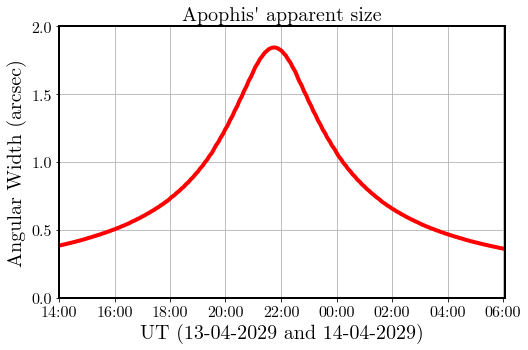

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Apophis' apparent size",size=20)
ax.plot(ephemeris['hours'],ephemeris['ang_width'],'r-',lw=4)
ax.set_xlabel("UT (13-04-2029 and 14-04-2029)")
ax.set_ylabel("Angular Width (arcsec)")
ax.grid()
xaxes()
plt.yticks(size=16)
plt.ylim([0,2])

name = "../Figures/fig3_magV"
# plt.savefig(name+".pdf",bbox_inches='tight')
# plt.savefig(name+".png",bbox_inches='tight')

## Loading Observatory Data

In [8]:
radio =  pd.read_csv("../AllRadiotelescopes.csv").dropna(axis=0,how='all')
# radio

In [9]:
angles = []
for r,row in ephemeris.iterrows():
    angle = utils.size_angle(radio.iloc[0],row)
    angles.append( angle.to(u.arcsec).value )

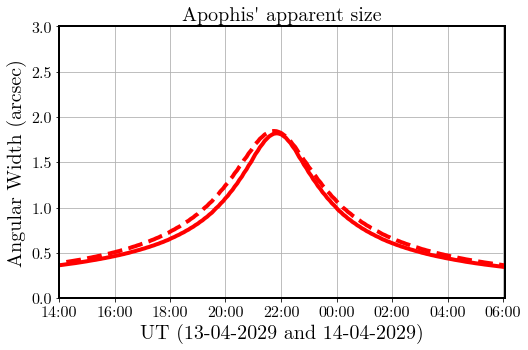

In [10]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Apophis' apparent size",size=20)
ax.plot(ephemeris['hours'],angles,'r-',lw=4)
ax.plot(ephemeris['hours'],ephemeris['ang_width'],'r--',lw=4)

ax.set_xlabel("UT (13-04-2029 and 14-04-2029)")
ax.set_ylabel("Angular Width (arcsec)")
ax.grid()
xaxes()
plt.yticks(size=16)
plt.ylim([0,3])

name = "../Figures/fig3_magV"
# plt.savefig(name+".pdf",bbox_inches='tight')
# plt.savefig(name+".png",bbox_inches='tight')

In [73]:
radio_pairs = [
               (radio.iloc[0],radio.iloc[1]), # Arecibo vs Goldstone
               (radio.iloc[0],radio.iloc[3]), # Arecibo vs GBT
               (radio.iloc[0],radio.iloc[5]), # Arecibo vs VLA
               (radio.iloc[1],radio.iloc[3]), # Goldstone vs GBT
               (radio.iloc[1],radio.iloc[5]), # Goldstone vs VLA
               (radio.iloc[1],radio.iloc[7]), # Goldstone vs FAST
               (radio.iloc[7],radio.iloc[8]), # FAST vs Camberra
               (radio.iloc[7],radio.iloc[9]), # FAST vs East
               (radio.iloc[7],radio.iloc[12]), # FAST vs GREAT
]

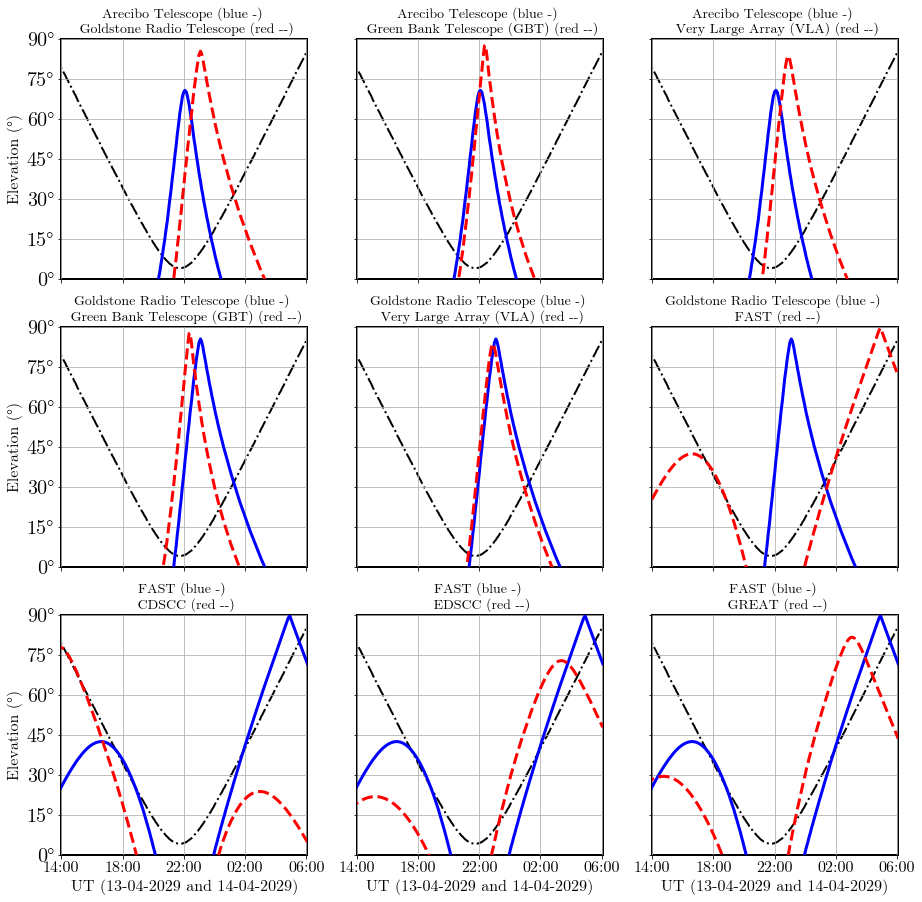

In [74]:
def axes(ax,i):
    ax.grid()
    ax.set_ylim([0,90])
    ax.set_xlim([0,ephemeris['hours'].iloc[-1]])
    xticks = range(6,len(ephemeris),48)
    ax.set_xlim([ephemeris['hours'].iloc[6],ephemeris['hours'].iloc[-1]])
    ax.set_xticks([ephemeris['hours'][i] for i in xticks])
    yticks = list(range(0,91,15))
    ax.set_yticks(yticks)

    if i > 5:
        ax.set_xticklabels([ephemeris['datetime_str'][i][-5:] for i in xticks],size=16)
        ax.set_xlabel("UT (13-04-2029 and 14-04-2029)",size=16)
    else:
        ax.set_xticklabels([])

    if i%3 == 0:
        ax.set_yticklabels(["%i°"%h for h in yticks])
        ax.set_ylabel("Elevation (°)",size=16)
    else:
        ax.set_yticklabels([])

fig, axs = plt.subplots(3,3, figsize=(15,15))
for i,pairobs in enumerate(radio_pairs):
    obs1, obs2 = pairobs
    pair = utils.observatory_pair(obs1,obs2,ephemeris)

    ax = axs.flat[i]
    ax2=ax.twinx()

    ax2.plot(ephemeris['hours'],ephemeris['delta (Rt)']-1,'k-.',lw=2)
    ax2.set_yticks([])

    ax.set_title(f"{obs1['Name']} (blue -) \n {obs2['Name']} (red --)",size=14)
    ax.plot(ephemeris['hours'],pair['elevation1'],label=f"Elevation from {obs1['Name']}",lw=3,color='b')
    ax.plot(ephemeris['hours'],pair['elevation2'],'--',label=f"Elevation from {obs2['Name']}",lw=3,color='r')
    ax.plot([-100],[-100],'k--',label='Distance',lw=3)
    # ax.set_ylabel("Apophis' Elevation (°)",size=14)
    axes(ax,i)

    # ax.grid()
    # # plt.legend()
    # ax2.set_ylabel("Distance to Apophis ($R_t$)",size=14)
    # # ax.legend(loc=2)

    ax.set_zorder(ax2.get_zorder()+1)
    ax.set_frame_on(False)